In [111]:
import socnet as sn
import networkx as nx
import pickle
import holoviews as hv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as ss
import numpy as np
import datetime

from scipy.optimize import minimize, fmin_l_bfgs_b
from scipy.stats.stats import pearsonr

# import coreness
# hv.extension('bokeh')
# %opts Graph [width=400 height=400]

In [88]:
sn.node_size = 10
sn.node_color = (255, 255, 255)

sn.edge_width = 1
sn.edge_color = (192, 192, 192)

sn.node_label_position = 'top center'

## Grafo
<img src='./youtubeegg.png'/>

In [89]:
try:
    g = pickle.load(open('graph.p', 'rb'))
except:
    g = sn.load_graph('./collector/output.gml', has_pos=False)
    pickle.dump(g, open('graph.p', 'wb'))

for n in g.nodes:
    if ('country' not in g.nodes[n]):
        g.nodes[n]['country'] = None
    if ('publishedAt' not in g.nodes[n]):
        g.nodes[n]['publishedAt'] = None
        
    g.nodes[n]['viewCount'] = int(g.nodes[n]['viewCount'])
    g.nodes[n]['subscriberCount'] = int(g.nodes[n]['subscriberCount'])
    g.nodes[n]['videoCount'] = int(g.nodes[n]['videoCount'])
    if g.nodes[n]['publishedAt'] != None:
        g.nodes[n]['publishedAt'] = datetime.datetime.fromisoformat(g.nodes[n]['publishedAt'][:-1]).timestamp()

In [47]:
#sn.show_graph(g, nlab=False)

In [8]:
in_degree = sorted([(g.nodes[k], v) for k, v in dict(g.in_degree()).items()], key=lambda x: -x[1])
# s = [g.nodes[x[0]] for x in s if g.nodes[x[0]]['country'] == 'BR']
in_degree

[({'visited': 1,
   'title': 'Vevo',
   'publishedAt': 1145045249.0,
   'viewCount': 549779903,
   'commentCount': '0',
   'subscriberCount': 17726175,
   'hiddenSubscriberCount': 0,
   'videoCount': 1552,
   'topics': {'n0': 'music'},
   'counterId': 956,
   'color': (255, 255, 255),
   'pos': (0.5339688413982051, 0.3292912282625936),
   'country': None},
  25),
 ({'visited': 1,
   'title': 'Elgato Gaming',
   'publishedAt': 1277251396.0,
   'viewCount': 6547153,
   'commentCount': '0',
   'subscriberCount': 354843,
   'hiddenSubscriberCount': 0,
   'videoCount': 153,
   'topics': {'n0': 'gaming', 'n1': 'technology', 'n2': 'lifestyle'},
   'counterId': 1475,
   'color': (255, 255, 255),
   'pos': (0.13541765653438587, 0.8278394288222638),
   'country': None},
  24),
 ({'visited': 1,
   'title': 'Vikkstar123',
   'country': 'GB',
   'publishedAt': 1271086765.0,
   'viewCount': 1475937480,
   'commentCount': '0',
   'subscriberCount': 5414470,
   'hiddenSubscriberCount': 0,
   'videoCou

In [182]:
def cost(c, A):
    row = np.matrix(c)
    print('a')

    C = np.multiply(row.transpose(), row)

    correlation, _ = pearsonr(C.flat, A.flat)

    return -correlation


def write_coreness(g):
    length = g.number_of_nodes()

    c = np.random.rand(length)

    A = sn.build_matrix(g)

    bounds = [(0, 1) for _ in range(length)]

    result = minimize(cost, c, args=(A,), bounds=bounds)

    norm = 0

    for i, n in enumerate(g.nodes):
        g.nodes[n]['coreness'] = result['x'][i]

        norm += g.nodes[n]['coreness'] ** 2

    for n in g.nodes:
        g.nodes[n]['coreness'] /= norm

In [ ]:
# cor = coreness(g)
# cor
# nx.to_numpy_matrix(g)
write_coreness(g)
# write_coreness(g)

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


In [118]:
outdegrees = g.out_degree()
for k, v in outdegrees:
    g.nodes[k]["outdegrees"] = v
    
indegrees = g.in_degree()
for k, v in indegress:
    g.nodes[k]["indegrees"] = v
    
bw = nx.betweenness_centrality(g)
for k,v in bw.items():
    g.nodes[k]["betweenness"] = v

closeness = nx.closeness_centrality(g)
for k,v in closeness.items():
    g.nodes[k]["closeness"] = v


In [119]:
# bw = nx.betweenness_centrality(g)
# betweenness = sorted([(g.nodes[k], v) for k, v in bw.items()], key=lambda x: -x[1])

In [179]:
"""
Calculates each node's coreness value, as described by Stephen Borgatti
"""

__author__ = """Alex Levenson (alex@isnontinvain.com)"""

#(C) Reya Group: http://www.reyagroup.com
#Alex Levenson (alex@isnotinvain.com)
#BSD license.

__all__ = ["triadic_census"]

def core_correlation(A,C):
    """
    returns the pearson correlation between A and
    the ideal coreness matrix created from C
    A: ajacency matrix (valued or unvalued)
    C: 1D matrix representing the coreness of each node
    """
    cMat = np.matrix(C)
    Cij = np.multiply(cMat,cMat.transpose())
    return pearsonr(A.flat,Cij.flat)

def _core_fitness(C,*args):
    """
    converts coreCorrelation(A,C) to something useable
    with scipy.optimize (which aims to MINIMIZE a function)
    Need to express highest positive correlation as function
    to be minimized
    """
    return core_correlation(args[0],C)[0] * -1.0

def cb(xk):
    print(xk)
    
def coreness(G,return_correlation=False):
    """
    Calculates each node's coreness value, as described by Stephen Borgatti

    Coreness describes to what degree a node is a member of the graph's core
    Parameters
    ----------
    G : graph
    A networkx graph

    return_correlation : whether to return the final correlation to the ideal core / periphery structure
    Returns
    -------
    census : dictionary
    Dictionary with nodes as keys and coreness as values
    *if return_correlation is set, then returns a tuple (dict with nodes as keys and coreness as values,correlation)* 
    Refrences
    ---------	
    .. [1] Models of Core/Periphery Structures
        Stephen P. Borgatti, Boston College
        http://dx.doi.org/10.1016/S0378-8733(99)00019-2
        """

    print('1')
    A = nx.to_numpy_matrix(G)
    print('2')
    # need a starting point for the optimizer, for now using a random starting point.
    initialC = np.random.rand(len(A)) # can we do better? Is it important? Maybe use constraint or centrality? 
    print('3')

    # run a bfgs optimizers that optimizes correlation between calculated coreness scores and the ideal model
    best = fmin_l_bfgs_b(_core_fitness,
                         initialC,
                         args=(A,None),
                         approx_grad=True,
                         bounds=[(0.0,1.0) for i in range(len(A))],
                         callback=cb, 
                        )
    print('4')

    part = {}
    for node in G:
        print(node)
        part[node] = best[0][G.nodes().index(node)]

        # return correlation to ideal if return_correlation is set
        if return_correlation: 
            return part,best[1] * -1.0
    return part

### Kindness

In [120]:
def kindness(cid):
    own_subs = int(g.nodes[cid]['subscriberCount'])
    kindness = 0
    neighbors = list(nx.neighbors(g, cid))
    if (len(neighbors) == 0):
        return 0
    
    neighbor_subs = [int(g.nodes[n]['subscriberCount']) for n in neighbors]
    for ns in neighbor_subs:
        if (ns < 10):
            continue
        kindness += own_subs/ns
    kindness /= len(neighbors)
    return kindness

MAX_KINDNESS = 0
for n in g.nodes:
    g.nodes[n]['kindness'] = kindness(n)
    if g.nodes[n]['kindness'] > MAX_KINDNESS:
        MAX_KINDNESS = g.nodes[n]['kindness']

for n in g.nodes:
    g.nodes[n]['kindness'] /= MAX_KINDNESS

In [121]:
k = sorted([(g.nodes[k],g.nodes[k]['kindness']) for k in g.nodes], key=lambda x: -x[1])
k_br = sorted([(g.nodes[k],g.nodes[k]['kindness']) for k in g.nodes if g.nodes[k]['country'] == 'BR'], key=lambda x: -x[1])
k_br

[({'visited': 1,
   'title': 'Hoje e dia de Marias',
   'country': 'BR',
   'publishedAt': 1454875046.0,
   'viewCount': 515461324,
   'commentCount': '0',
   'subscriberCount': 2633115,
   'hiddenSubscriberCount': 0,
   'videoCount': 569,
   'topics': {'n0': 'hobby', 'n1': 'lifestyle'},
   'counterId': 2558,
   'color': (255, 255, 255),
   'pos': (0.5309357628230355, 0.5038837415916801),
   'outdegrees': 21,
   'indegrees': 2,
   'betweenness': 0.0006506892404037729,
   'closeness': 0.007838477308807443,
   'kindness': 0.028209145291022444},
  0.028209145291022444),
 ({'visited': 1,
   'title': 'SanInPlay',
   'country': 'BR',
   'publishedAt': 1326338867.0,
   'viewCount': 111878056,
   'commentCount': '0',
   'subscriberCount': 1109162,
   'hiddenSubscriberCount': 0,
   'videoCount': 1238,
   'topics': {'n0': 'gaming'},
   'counterId': 762,
   'color': (255, 255, 255),
   'pos': (0.5069389617622548, 0.5278203256471768),
   'outdegrees': 12,
   'indegrees': 2,
   'betweenness': 0.000

In [122]:
df = pd.DataFrame({})

for n in g.nodes:
    df = df.append({
        'title': g.nodes[n]['title'],
        'country': g.nodes[n]['country'],
        'publishedAt': g.nodes[n]['publishedAt'],
        'viewCount': g.nodes[n]['viewCount'],
        'subscriberCount': g.nodes[n]['subscriberCount'],
        'videoCount': g.nodes[n]['videoCount'],
        'topics': g.nodes[n]['topics'],
        'kindness': g.nodes[n]['kindness'],
        'outdegrees': g.nodes[n]['outdegrees'],
        'indegrees': g.nodes[n]['indegrees'],
        'betweenness': g.nodes[n]['betweenness'],
        'closeness': g.nodes[n]['closeness'],
    }, ignore_index=True)

In [172]:
sorted_df = df.sort_values(by='subscriberCount', ascending=False)
sorted_df[sorted_df.country == 'BR']

,betweenness,closeness,country,indegrees,kindness,outdegrees,publishedAt,subscriberCount,title,topics,videoCount,viewCount
431,2.393338e-02,0.017930,BR,7.0,0.000398,5.0,1.14777e+09,27815339.0,Felipe Neto,"{'n0': 'entertainment', 'n1': 'lifestyle', 'n2...",1441.0,5.323839e+09
622,1.666501e-05,0.015925,BR,3.0,0.000312,3.0,1.40679e+09,21109795.0,Luccas Neto,"{'n0': 'lifestyle', 'n1': 'food', 'n2': 'enter...",550.0,4.639199e+09
248,4.003985e-03,0.010971,BR,14.0,0.000490,23.0,1.3291e+09,20877027.0,rezendeevil,"{'n0': 'role-playing video game', 'n1': 'gamin...",6845.0,7.221062e+09
43,4.821793e-04,0.011471,BR,3.0,0.000285,4.0,1.37809e+09,19148707.0,Voce Sabia?,"{'n0': 'entertainment', 'n1': 'lifestyle'}",681.0,2.062269e+09
228,1.876837e-03,0.011050,BR,17.0,0.001220,19.0,1.31796e+09,15780628.0,AuthenticGames,"{'n0': 'role-playing video game', 'n1': 'gaming'}",3516.0,6.318297e+09
30,0.000000e+00,0.000000,BR,0.0,0.004220,7.0,1.33154e+09,15056101.0,Porta dos Fundos,"{'n0': 'entertainment', 'n1': 'humor', 'n2': '...",947.0,4.356892e+09
205,2.267461e-04,0.011007,BR,12.0,0.000317,10.0,1.35555e+09,12164492.0,AM3NlC,"{'n0': 'role-playing video game', 'n1': 'gaming'}",3789.0,3.319216e+09
621,1.686893e-05,0.015925,BR,3.0,0.000707,5.0,1.50068e+09,11831548.0,Irmaos Neto,"{'n0': 'humor', 'n1': 'entertainment'}",198.0,1.058501e+09
123,3.240718e-03,0.011587,BR,7.0,0.000224,7.0,1.22196e+09,11656290.0,Canal Nostalgia,"{'n0': 'movies', 'n1': 'entertainment'}",314.0,9.487899e+08
17,4.204721e-05,0.012037,BR,1.0,0.001432,3.0,1.15376e+09,11409853.0,Manual do Mundo,{'n0': 'lifestyle'},1400.0,1.947152e+09


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



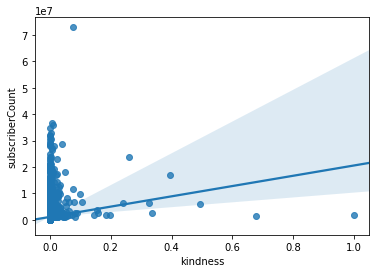

In [124]:
x = sns.regplot(data=df, x='kindness', y='subscriberCount')
# x.set_yscale('linear')

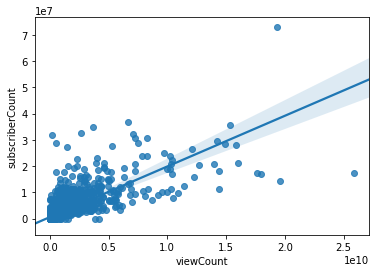

In [125]:
y = sns.regplot(data=df, x='viewCount', y='subscriberCount')

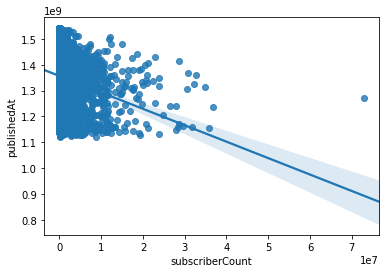

In [126]:
z = sns.regplot(data=df, x='subscriberCount', y='publishedAt')

In [127]:
df['kindness'].corr(df['subscriberCount'])

0.12292702623933897

In [128]:
df['viewCount'].corr(df['subscriberCount'])

0.7610870534177299

In [129]:
df['publishedAt'].astype(float).corr(df['subscriberCount'])

-0.1669796549579717

In [138]:
df['kindness'].corr(df['closeness'])

0.018404340446056884

In [32]:
d = datetime.datetime.fromisoformat('2016-12-12T00:56:10.000').timestamp

In [31]:
d.timestamp()

1481511370.0

In [33]:
a = '21312213'

In [37]:
a[:-1]

'2131221'

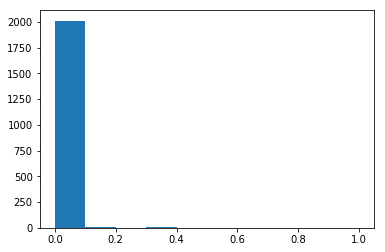

In [167]:
bet = [g.nodes[x]['kindness'] for x in g.nodes if g.nodes[x]['kindness'] > 0]
hist = plt.hist(bet, bins=10)
xdata = [(l + r) / 2 for l, r in zip(hist[1][:-1], hist[1][1:])]
ydata = [h + 1 for h in hist[0]]

# # Calcula uma regressão linear sobre os logaritmos dos dados.
# reg = ss.linregress(np.log(xdata), np.log(ydata))

# # Plota uma exponencial da curva de regressão.
# plt.plot(xdata, [x ** reg[0] * np.exp(reg[1]) - 1 for x in xdata])

# Exibe o gráfico.
# plt.title('distribuição de quantidade de citações')
plt.show()

In [166]:
bet

[0.0053302211565425675,
 0.013075327486582666,
 0.00017924413285849776,
 0.0,
 0.0,
 0.00015394916413562055,
 0.0,
 0.00012434038700179223,
 0.0,
 0.0,
 0.0,
 0.0015817025238168475,
 0.0,
 0.019771339943964343,
 0.0,
 0.0,
 0.0,
 0.0014317044841951389,
 0.0,
 0.0,
 0.0019504088703705999,
 0.001250084306557765,
 0.0,
 0.0,
 0.0,
 0.00018935465321016212,
 0.0,
 0.0,
 0.0,
 0.0,
 0.004220369849225829,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.59238255865657e-05,
 7.173841434000592e-05,
 8.889617446702261e-05,
 0.0,
 0.0002848996444948613,
 0.0002616034194038964,
 0.00018826802242326407,
 0.0,
 0.0,
 0.0,
 0.0,
 5.028928450238411e-05,
 4.0686312132954184e-05,
 0.0006131581304795544,
 0.0,
 4.408643885220492e-05,
 0.0,
 2.7607193488878963e-05,
 8.298209052441897e-05,
 0.0,
 0.000180592533479971,
 0.0,
 0.0,
 0.0,
 0.02047805553307583,
 0.0,
 0.0,
 0.0005272541431597961,
 0.0,
 0.0,
 0.0,
 0.15569873188607153,
 0.00016427897726193263,
 0.0,
 0.0,
 0.0,
 0.0,
 5.007223629508765e-05,
